In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
loans = pd.read_csv('../data/loans_full_schema.csv')

In [3]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         9167 non-null   object 
 1   emp_length                        9183 non-null   float64
 2   state                             10000 non-null  object 
 3   homeownership                     10000 non-null  object 
 4   annual_income                     10000 non-null  float64
 5   verified_income                   10000 non-null  object 
 6   debt_to_income                    9976 non-null   float64
 7   annual_income_joint               1495 non-null   float64
 8   verification_income_joint         1455 non-null   object 
 9   debt_to_income_joint              1495 non-null   float64
 10  delinq_2y                         10000 non-null  int64  
 11  months_since_last_delinq          4342 non-null   float64
 12  earli

In [4]:
loans.describe()

,emp_length,annual_income,debt_to_income,annual_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,...,public_record_bankrupt,loan_amount,term,interest_rate,installment,balance,paid_total,paid_principal,paid_interest,paid_late_fees
count,9183.000000,1.000000e+04,9976.000000,1.495000e+03,1495.000000,10000.00000,4342.000000,10000.00000,10000.00000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.930306,7.922215e+04,19.308192,1.279146e+05,19.979304,0.21600,36.760709,2001.29000,1.95820,22.679600,...,0.123800,16361.922500,43.272000,12.427524,476.205323,14458.916610,2494.234773,1894.448466,599.666781,0.119516
std,3.703734,6.473429e+04,15.004851,7.016838e+04,8.054781,0.68366,21.634939,7.79551,2.38013,11.885439,...,0.337172,10301.956759,11.029877,5.001105,294.851627,9964.561865,3958.230365,3884.407175,517.328062,1.813468
min,0.000000,0.000000e+00,0.000000,1.920000e+04,0.320000,0.00000,1.000000,1963.00000,0.00000,2.000000,...,0.000000,1000.000000,36.000000,5.310000,30.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,4.500000e+04,11.057500,8.683350e+04,14.160000,0.00000,19.000000,1997.00000,0.00000,14.000000,...,0.000000,8000.000000,36.000000,9.430000,256.040000,6679.065000,928.700000,587.100000,221.757500,0.000000
50%,6.000000,6.500000e+04,17.570000,1.130000e+05,19.720000,0.00000,34.000000,2003.00000,1.00000,21.000000,...,0.000000,14500.000000,36.000000,11.980000,398.420000,12379.495000,1563.300000,984.990000,446.140000,0.000000
75%,10.000000,9.500000e+04,25.002500,1.515455e+05,25.500000,0.00000,53.000000,2006.00000,3.00000,29.000000,...,0.000000,24000.000000,60.000000,15.050000,644.690000,20690.182500,2616.005000,1694.555000,825.420000,0.000000
max,10.000000,2.300000e+06,469.090000,1.100000e+06,39.980000,13.00000,118.000000,2015.00000,29.00000,87.000000,...,3.000000,40000.000000,60.000000,30.940000,1566.590000,40000.000000,41630.443684,40000.000000,4216.440000,52.980000


In [5]:
loans.dtypes

emp_title                            object
emp_length                          float64
state                                object
homeownership                        object
annual_income                       float64
verified_income                      object
debt_to_income                      float64
annual_income_joint                 float64
verification_income_joint            object
debt_to_income_joint                float64
delinq_2y                             int64
months_since_last_delinq            float64
earliest_credit_line                  int64
inquiries_last_12m                    int64
total_credit_lines                    int64
open_credit_lines                     int64
total_credit_limit                    int64
total_credit_utilized                 int64
num_collections_last_12m              int64
num_historical_failed_to_pay          int64
months_since_90d_late               float64
current_accounts_delinq               int64
total_collection_amount_ever    

In [6]:
pd.crosstab(loans['application_type'], loans['homeownership'], margins=True)

homeownership,MORTGAGE,OWN,RENT,All
application_type,,,,
individual,3839,1170,3496,8505
joint,950,183,362,1495
All,4789,1353,3858,10000


In [7]:
pd.crosstab(index=loans['homeownership'], columns='count', margins=True)

col_0,count,All
homeownership,,
MORTGAGE,4789,4789
OWN,1353,1353
RENT,3858,3858
All,10000,10000


<AxesSubplot:xlabel='homeownership'>

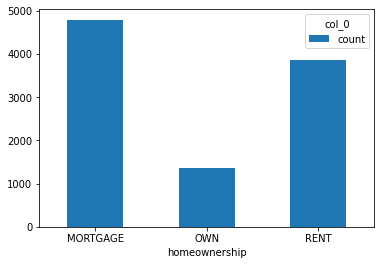

In [8]:
pd.crosstab(index=loans['homeownership'], columns='count').plot.bar(rot=0)

<Figure size 864x576 with 0 Axes>

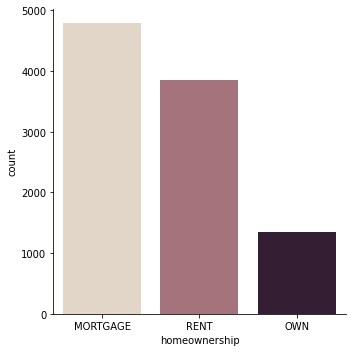

In [9]:
plt.figure(figsize = (12,8))
sns.catplot(x="homeownership", kind="count", palette="ch:.25", data=loans)

In [10]:
pd.crosstab(loans['application_type'], loans['homeownership'], margins=True, normalize='index')

homeownership,MORTGAGE,OWN,RENT
application_type,,,
individual,0.451382,0.137566,0.411052
joint,0.635452,0.122408,0.242140
All,0.478900,0.135300,0.385800


In [11]:
pd.crosstab(loans['application_type'], loans['homeownership'], margins=True, normalize='columns')

homeownership,MORTGAGE,OWN,RENT,All
application_type,,,,
individual,0.801629,0.864745,0.906169,0.8505
joint,0.198371,0.135255,0.093831,0.1495


<AxesSubplot:xlabel='homeownership'>

<Figure size 864x576 with 0 Axes>

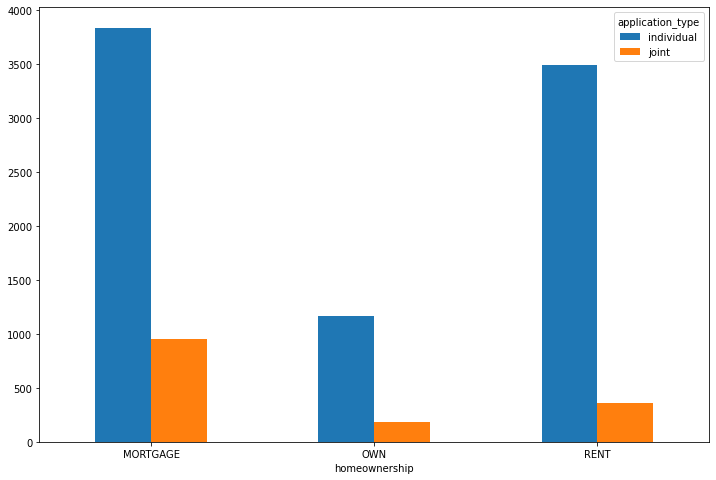

In [12]:
plt.figure(figsize = (12,8))
pd.crosstab(loans['homeownership'], loans['application_type'], ).plot.bar(figsize=(12, 8), rot=0)

<AxesSubplot:xlabel='homeownership'>

<Figure size 864x576 with 0 Axes>

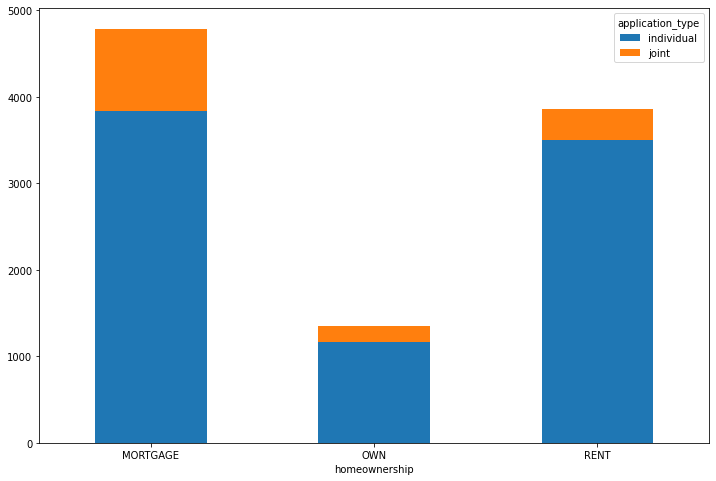

In [13]:
plt.figure(figsize = (12,8))
pd.crosstab(loans['homeownership'], loans['application_type'], ).plot.bar(figsize=(12, 8), stacked=True, rot=0)

<AxesSubplot:xlabel='homeownership'>

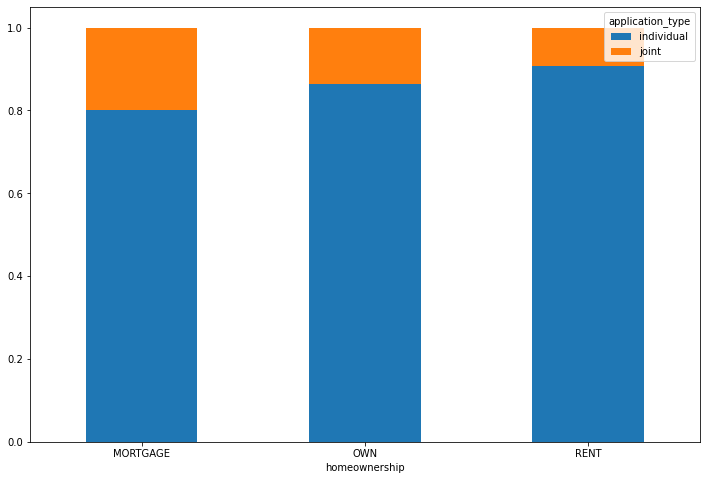

In [14]:
pd.crosstab(loans['homeownership'], loans['application_type'], normalize='index').plot.bar(figsize=(12, 8), stacked=True, rot=0)

In [15]:
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

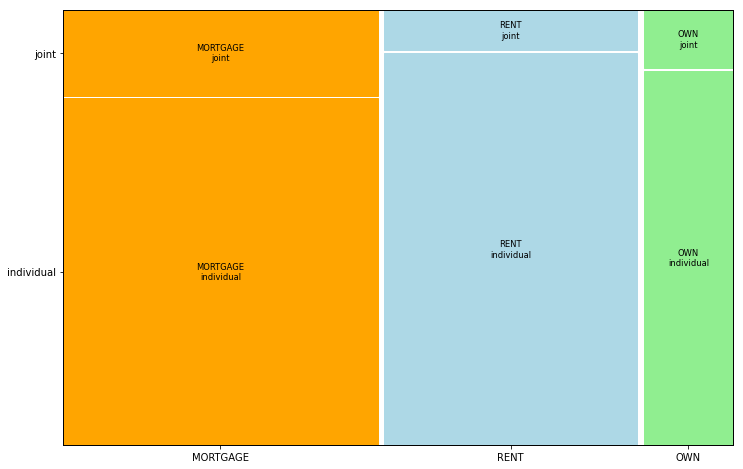

In [16]:
def c_func(key):
  if 'MORTGAGE' in key:
    return {'color': 'orange'}
  elif 'RENT' in key:
    return {'color': 'lightblue'}
  elif 'OWN' in key:
    return {'color': 'lightgreen'}

plt.rcParams["figure.figsize"] = [12, 8]

mosaic(loans, ['homeownership', 'application_type'], properties=c_func, gap=.01,);

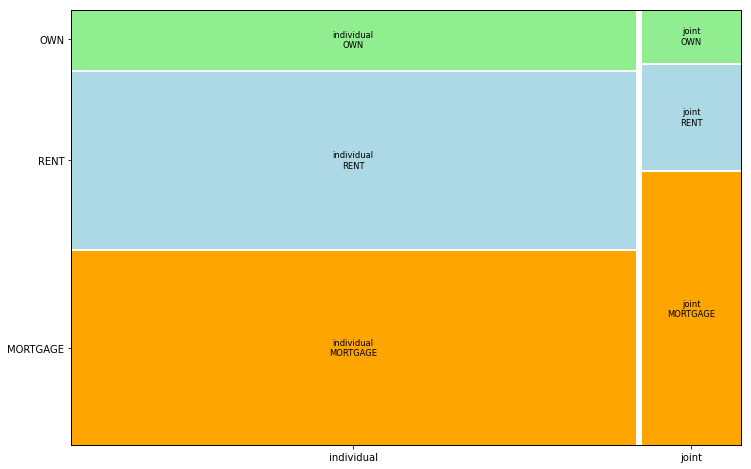

In [17]:
def c_func(key):
  if 'MORTGAGE' in key:
    return {'color': 'orange'}
  elif 'RENT' in key:
    return {'color': 'lightblue'}
  elif 'OWN' in key:
    return {'color': 'lightgreen'}

plt.rcParams["figure.figsize"] = [12, 8]

mosaic(loans, ['application_type', 'homeownership'], properties=c_func, gap=.01,);

In [18]:
loans.groupby('homeownership')['homeownership'].count()

homeownership
MORTGAGE    4789
OWN         1353
RENT        3858
Name: homeownership, dtype: int64

In [19]:
loans.groupby('homeownership')['homeownership'].count().index

Index(['MORTGAGE', 'OWN', 'RENT'], dtype='object', name='homeownership')

([<matplotlib.patches.Wedge at 0x1f042f097c8>,
 [Text(0.07286302738922877, 1.0975841558803938, 'MORTGAGE'),
  Text(-1.053284256083236, -0.31716285388926646, 'OWN'),
  Text(0.3862348634769816, -1.0299624411768216, 'RENT')])

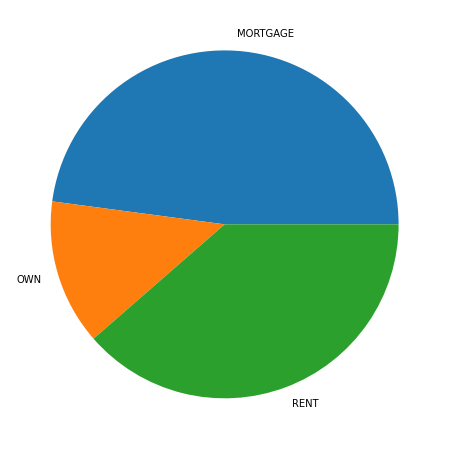

In [20]:
plt.figure(figsize = (12,8))
plt.pie(loans.groupby('homeownership')['homeownership'].count(), labels=loans.groupby('homeownership')['homeownership'].count().index)

In [21]:
county = pd.read_csv('../data/county.csv')

In [22]:
county.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               3142 non-null   object 
 1   state              3142 non-null   object 
 2   pop2000            3139 non-null   float64
 3   pop2010            3142 non-null   int64  
 4   pop2017            3139 non-null   float64
 5   pop_change         3139 non-null   float64
 6   poverty            3140 non-null   float64
 7   homeownership      3142 non-null   float64
 8   multi_unit         3142 non-null   float64
 9   unemployment_rate  3139 non-null   float64
 10  metro              3139 non-null   object 
 11  median_edu         3140 non-null   object 
 12  per_capita_income  3140 non-null   float64
 13  median_hh_income   3140 non-null   float64
 14  smoking_ban        2562 non-null   object 
dtypes: float64(9), int64(1), object(5)
memory usage: 368.3+ KB


In [23]:
county.head()

,name,state,pop2000,pop2010,pop2017,pop_change,poverty,homeownership,multi_unit,unemployment_rate,metro,median_edu,per_capita_income,median_hh_income,smoking_ban
0,Autauga County,Alabama,43671.0,54571,55504.0,1.48,13.7,77.5,7.2,3.86,yes,some_college,27841.70,55317.0,none
1,Baldwin County,Alabama,140415.0,182265,212628.0,9.19,11.8,76.7,22.6,3.99,yes,some_college,27779.85,52562.0,none
2,Barbour County,Alabama,29038.0,27457,25270.0,-6.22,27.2,68.0,11.1,5.90,no,hs_diploma,17891.73,33368.0,partial
3,Bibb County,Alabama,20826.0,22915,22668.0,0.73,15.2,82.9,6.6,4.39,yes,hs_diploma,20572.05,43404.0,none
4,Blount County,Alabama,51024.0,57322,58013.0,0.68,15.6,82.0,3.7,4.02,yes,hs_diploma,21367.39,47412.0,none


In [24]:
county[county['pop2000'].isnull()]

,name,state,pop2000,pop2010,pop2017,pop_change,poverty,homeownership,multi_unit,unemployment_rate,metro,median_edu,per_capita_income,median_hh_income,smoking_ban
89,Skagway,Alaska,NaN,968,NaN,NaN,5.6,59.1,27.2,10.56,no,some_college,38150.23,70673.0,NaN
93,Wrangell,Alaska,NaN,2369,NaN,NaN,11.7,78.7,11.9,7.71,no,some_college,30153.57,56094.0,NaN
251,Broomfield County,Colorado,NaN,55889,68341.0,13.78,5.2,74.4,21.7,2.63,yes,bachelors,44114.98,85639.0,NaN


In [25]:
county.dropna()

,name,state,pop2000,pop2010,pop2017,pop_change,poverty,homeownership,multi_unit,unemployment_rate,metro,median_edu,per_capita_income,median_hh_income,smoking_ban
0,Autauga County,Alabama,43671.0,54571,55504.0,1.48,13.7,77.5,7.2,3.86,yes,some_college,27841.70,55317.0,none
1,Baldwin County,Alabama,140415.0,182265,212628.0,9.19,11.8,76.7,22.6,3.99,yes,some_college,27779.85,52562.0,none
2,Barbour County,Alabama,29038.0,27457,25270.0,-6.22,27.2,68.0,11.1,5.90,no,hs_diploma,17891.73,33368.0,partial
3,Bibb County,Alabama,20826.0,22915,22668.0,0.73,15.2,82.9,6.6,4.39,yes,hs_diploma,20572.05,43404.0,none
4,Blount County,Alabama,51024.0,57322,58013.0,0.68,15.6,82.0,3.7,4.02,yes,hs_diploma,21367.39,47412.0,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,Sweetwater County,Wyoming,37613.0,43806,43534.0,-3.57,12.0,73.7,14.6,4.55,no,some_college,30282.59,71083.0,none
3138,Teton County,Wyoming,18251.0,21294,23265.0,4.21,6.8,60.8,31.9,2.99,no,bachelors,48557.37,80049.0,partial
3139,Uinta County,Wyoming,19742.0,21118,20495.0,-2.22,14.9,73.7,17.0,4.50,no,some_college,27048.12,54672.0,none
3140,Washakie County,Wyoming,8289.0,8533,8064.0,-4.31,12.8,70.9,10.0,4.08,no,some_college,27494.83,51362.0,none


In [26]:
county.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               3142 non-null   object 
 1   state              3142 non-null   object 
 2   pop2000            3139 non-null   float64
 3   pop2010            3142 non-null   int64  
 4   pop2017            3139 non-null   float64
 5   pop_change         3139 non-null   float64
 6   poverty            3140 non-null   float64
 7   homeownership      3142 non-null   float64
 8   multi_unit         3142 non-null   float64
 9   unemployment_rate  3139 non-null   float64
 10  metro              3139 non-null   object 
 11  median_edu         3140 non-null   object 
 12  per_capita_income  3140 non-null   float64
 13  median_hh_income   3140 non-null   float64
 14  smoking_ban        2562 non-null   object 
dtypes: float64(9), int64(1), object(5)
memory usage: 368.3+ KB


In [27]:
county.dropna(inplace=True)

In [28]:
county.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2560 entries, 0 to 3141
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               2560 non-null   object 
 1   state              2560 non-null   object 
 2   pop2000            2560 non-null   float64
 3   pop2010            2560 non-null   int64  
 4   pop2017            2560 non-null   float64
 5   pop_change         2560 non-null   float64
 6   poverty            2560 non-null   float64
 7   homeownership      2560 non-null   float64
 8   multi_unit         2560 non-null   float64
 9   unemployment_rate  2560 non-null   float64
 10  metro              2560 non-null   object 
 11  median_edu         2560 non-null   object 
 12  per_capita_income  2560 non-null   float64
 13  median_hh_income   2560 non-null   float64
 14  smoking_ban        2560 non-null   object 
dtypes: float64(9), int64(1), object(5)
memory usage: 320.0+ KB


In [29]:
county.head()

,name,state,pop2000,pop2010,pop2017,pop_change,poverty,homeownership,multi_unit,unemployment_rate,metro,median_edu,per_capita_income,median_hh_income,smoking_ban
0,Autauga County,Alabama,43671.0,54571,55504.0,1.48,13.7,77.5,7.2,3.86,yes,some_college,27841.70,55317.0,none
1,Baldwin County,Alabama,140415.0,182265,212628.0,9.19,11.8,76.7,22.6,3.99,yes,some_college,27779.85,52562.0,none
2,Barbour County,Alabama,29038.0,27457,25270.0,-6.22,27.2,68.0,11.1,5.90,no,hs_diploma,17891.73,33368.0,partial
3,Bibb County,Alabama,20826.0,22915,22668.0,0.73,15.2,82.9,6.6,4.39,yes,hs_diploma,20572.05,43404.0,none
4,Blount County,Alabama,51024.0,57322,58013.0,0.68,15.6,82.0,3.7,4.02,yes,hs_diploma,21367.39,47412.0,none


In [30]:
county_pop_gain = county[county['pop_change'] > 0]

In [31]:
county_pop_gain.head()

,name,state,pop2000,pop2010,pop2017,pop_change,poverty,homeownership,multi_unit,unemployment_rate,metro,median_edu,per_capita_income,median_hh_income,smoking_ban
0,Autauga County,Alabama,43671.0,54571,55504.0,1.48,13.7,77.5,7.2,3.86,yes,some_college,27841.70,55317.0,none
1,Baldwin County,Alabama,140415.0,182265,212628.0,9.19,11.8,76.7,22.6,3.99,yes,some_college,27779.85,52562.0,none
3,Bibb County,Alabama,20826.0,22915,22668.0,0.73,15.2,82.9,6.6,4.39,yes,hs_diploma,20572.05,43404.0,none
4,Blount County,Alabama,51024.0,57322,58013.0,0.68,15.6,82.0,3.7,4.02,yes,hs_diploma,21367.39,47412.0,none
10,Chilton County,Alabama,39593.0,43643,44067.0,0.97,19.4,75.1,4.4,4.05,yes,hs_diploma,22793.82,43501.0,none


In [32]:
county_pop_no_gain = county[county['pop_change'] <= 0]

In [33]:
county_pop_no_gain.head()

,name,state,pop2000,pop2010,pop2017,pop_change,poverty,homeownership,multi_unit,unemployment_rate,metro,median_edu,per_capita_income,median_hh_income,smoking_ban
2,Barbour County,Alabama,29038.0,27457,25270.0,-6.22,27.2,68.0,11.1,5.90,no,hs_diploma,17891.73,33368.0,partial
5,Bullock County,Alabama,11714.0,10914,10309.0,-2.28,28.5,76.9,9.9,4.93,no,hs_diploma,15444.16,29655.0,none
8,Chambers County,Alabama,36583.0,34215,33713.0,-1.20,18.8,71.4,8.7,4.08,no,hs_diploma,21079.51,37342.0,none
9,Cherokee County,Alabama,23988.0,25989,25857.0,-0.60,16.1,77.5,4.3,4.05,no,hs_diploma,23067.93,40041.0,none
11,Choctaw County,Alabama,15922.0,13859,12945.0,-3.37,22.3,85.6,3.9,6.39,no,hs_diploma,20363.87,32122.0,none


In [34]:
random_state = 42

# 100 random sample of pop gain
county_pop_gain_sample = county_pop_gain.sample(n = 100, random_state = random_state)

# 50 random sample of pop gain
county_pop_no_gain_sample = county_pop_no_gain.sample(n = 50, random_state = random_state)

In [35]:
county_pop_gain_sample['pop_change']

2880    0.95
745     2.19
1716    1.35
2074    0.32
2192    0.17
        ... 
378     6.11
227     2.79
1456    0.19
1973    1.34
2886    0.04
Name: pop_change, Length: 100, dtype: float64

In [36]:
county_pop_no_gain_sample['pop_change']

3052   -1.55
1710   -1.16
1515   -1.43
2143   -6.63
2938   -0.37
2921   -5.16
689    -2.66
1452   -2.80
820    -4.23
1053   -1.33
2835   -0.14
1678   -2.08
130    -6.26
75     -1.29
674    -0.70
1442   -4.93
2246   -3.26
2643   -0.11
675    -1.85
1493   -0.86
1105   -2.65
932    -6.95
1159   -1.15
1282   -1.84
2255   -6.57
310    -2.61
2576   -0.34
662    -1.83
1559   -3.23
1444   -1.01
193    -1.29
2160   -1.68
1704   -1.07
315    -1.08
2297   -2.68
1570    0.00
91     -5.06
1915   -0.22
2427   -3.43
3050   -0.73
1061   -0.01
2392   -1.43
2287   -0.53
42     -5.46
1364   -1.89
3099   -1.66
829    -3.25
74     -1.18
1684   -2.45
1695   -1.68
Name: pop_change, dtype: float64

<AxesSubplot:ylabel='median_hh_income'>

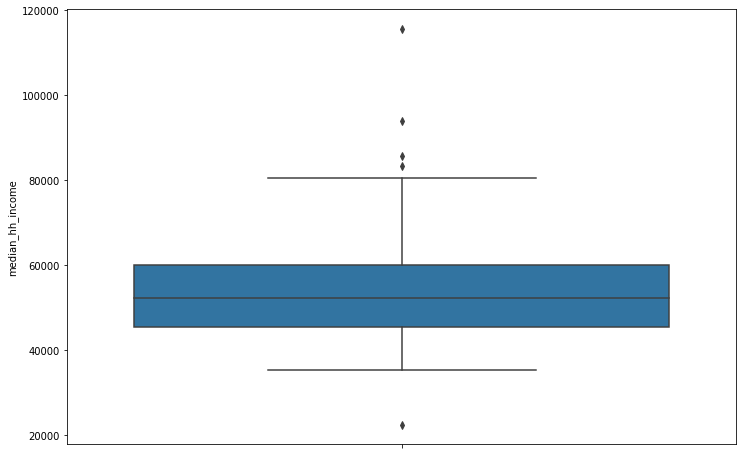

In [37]:
sns.boxplot(y=county_pop_gain_sample['median_hh_income'])

<AxesSubplot:ylabel='median_hh_income'>

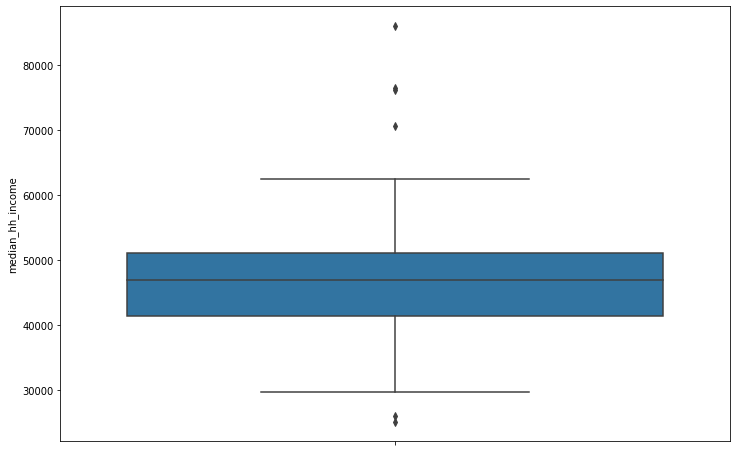

In [38]:
sns.boxplot(y=county_pop_no_gain_sample['median_hh_income'])

In [39]:
county_pop_gain_sample['gain'] = 'true'

In [40]:
county_pop_gain_sample.head()

,name,state,pop2000,pop2010,pop2017,pop_change,poverty,homeownership,multi_unit,unemployment_rate,metro,median_edu,per_capita_income,median_hh_income,smoking_ban,gain
2880,Nelson County,Virginia,14445.0,15020,14943.0,0.95,14.9,77.8,11.8,3.49,yes,some_college,32600.44,53834.0,none,true
745,Marion County,Indiana,860454.0,903393,950082.0,2.19,19.8,58.8,31.4,3.59,yes,some_college,25460.56,44869.0,none,true
1716,Nance County,Nebraska,4038.0,3735,3607.0,1.35,11.7,76.0,8.0,2.49,no,some_college,27369.55,45428.0,none,true
2074,Hancock County,Ohio,71295.0,74782,75754.0,0.32,12.1,71.1,21.4,3.62,no,some_college,30328.26,52831.0,none,true
2192,Pontotoc County,Oklahoma,35143.0,37492,38224.0,0.17,17.3,65.3,12.1,3.80,no,some_college,23890.16,46689.0,none,true


In [41]:
county_pop_no_gain_sample['gain'] = 'false'

In [42]:
county_pop_no_gain_sample.head()

,name,state,pop2000,pop2010,pop2017,pop_change,poverty,homeownership,multi_unit,unemployment_rate,metro,median_edu,per_capita_income,median_hh_income,smoking_ban,gain
3052,Buffalo County,Wisconsin,13804.0,13587,13167.0,-1.55,10.7,77.9,11.4,3.74,no,some_college,28784.72,54753.0,none,false
1710,Logan County,Nebraska,774.0,763,768.0,-1.16,9.7,68.1,0.0,2.77,no,some_college,24356.18,50278.0,none,false
1515,Dent County,Missouri,14927.0,15657,15480.0,-1.43,20.8,77.9,7.3,4.27,no,hs_diploma,20721.83,38829.0,none,false
2143,Cimarron County,Oklahoma,3148.0,2475,2154.0,-6.63,15.9,76.7,4.8,2.40,no,hs_diploma,28570.27,44667.0,none,false
2938,Norfolk city,Virginia,234403.0,242803,244703.0,-0.37,21.0,46.6,42.9,4.65,yes,some_college,25911.51,47137.0,none,false


In [43]:
county_pop_change = pd.concat([county_pop_gain_sample, county_pop_no_gain_sample])

<AxesSubplot:xlabel='gain', ylabel='median_hh_income'>

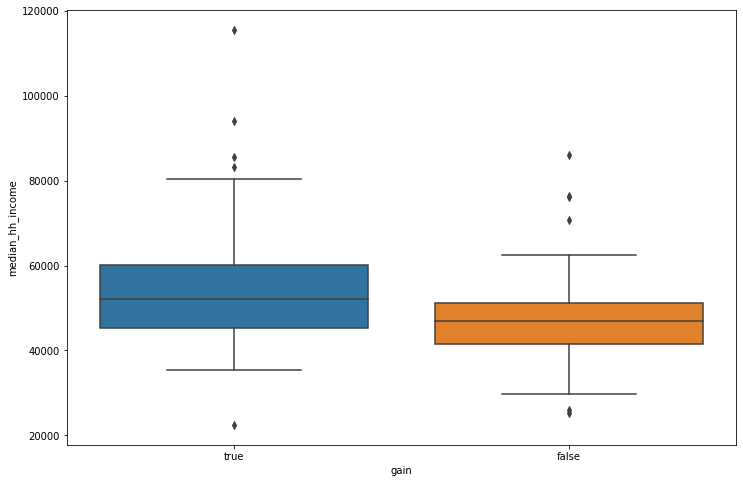

In [44]:
sns.boxplot(x='gain', y='median_hh_income', data=county_pop_change)

Text(0.5, 1.0, 'Median Household Income')

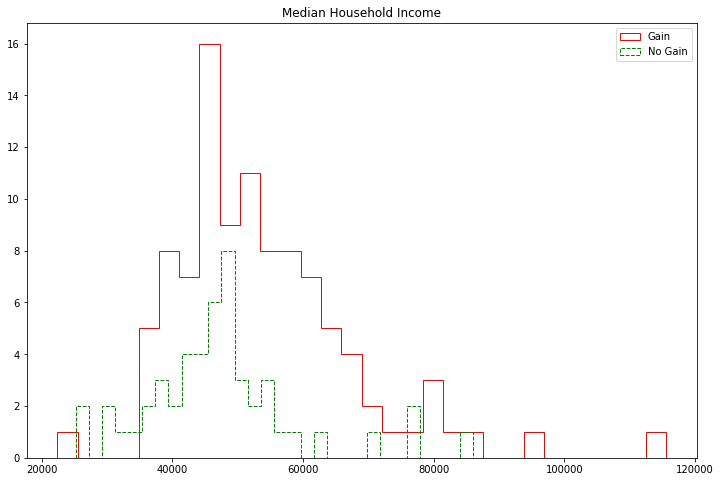

In [45]:
n_bins=30
x = county_pop_gain_sample['median_hh_income']
colors = ['Gain',]
plt.hist(x, n_bins, histtype='step', stacked=True, fill=False, label=colors, color = "red")
plt.legend(loc="upper right")
plt.title('Median Household Income')
n_bins=30
y = county_pop_no_gain_sample['median_hh_income']
colors = ['No Gain',]
plt.hist(y, n_bins, histtype='step', stacked=True, fill=False, label=colors, linestyle='dashed', color = "green")
plt.legend(loc="upper right")
plt.title('Median Household Income')

In [46]:
np.random.randn(10, 3)

array([[ 2.55183481e-02, -4.29077838e-01,  2.23420227e-01],
       [-1.90828846e+00, -3.06158383e-01, -2.83882089e-03],
       [ 1.29685839e+00, -1.51657279e+00,  2.17665540e+00],
       [ 2.59754594e-01,  6.30417333e-01, -9.48210627e-01],
       [ 4.68780490e-01, -8.54796551e-01, -4.22510349e-01],
       [-9.32270338e-01, -1.51465339e-01, -1.94554691e+00],
       [-4.48422601e-01, -5.36581265e-01, -2.42155904e+00],
       [-8.79783746e-01, -1.10794995e+00,  5.26636993e-03],
       [ 6.36345764e-04, -9.43761366e-01,  3.87376648e-01],
       [-4.32056847e-01, -1.10750440e+00,  7.13557054e-01]])